In [1]:
import warnings, os
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel
from aggmap import show

In [2]:
task = 'IBD'
data_path = '../01_data/species_level/%s/' % (task)

dfx = pd.read_csv(os.path.join(data_path, 'abundance.tsv'),sep='\t', header=None, index_col=0)
dfy = pd.read_csv(os.path.join(data_path, 'labels.txt'),sep='\t', header=None, index_col=0)
dfx = dfx.T
dfy.index.value_counts()

n      85
ibd    25
Name: 0, dtype: int64

In [3]:
dfx = np.log(dfx + 1e-2)
dfy = pd.get_dummies(dfy.index.map({'ibd':1, 'n':0}))

In [4]:
X = dfx.values.astype(float)
Y = dfy.values.astype(float)

In [5]:
mp = AggMap(dfx, metric = 'correlation')

2021-08-18 11:04:48,502 - INFO - [bidd-aggmap] - Calculating distance ...
2021-08-18 11:04:48,518 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 443/443 [00:00<00:00, 649.60it/s]


In [6]:
mp = mp.fit(cluster_channels = 5, verbose = 0, var_thr = 0)

2021-08-18 11:04:56,609 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-08-18 11:05:02,073 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-08-18 11:05:02,355 - INFO - [bidd-aggmap] - Finished


In [7]:
mp.fmap_shape

(22, 21)

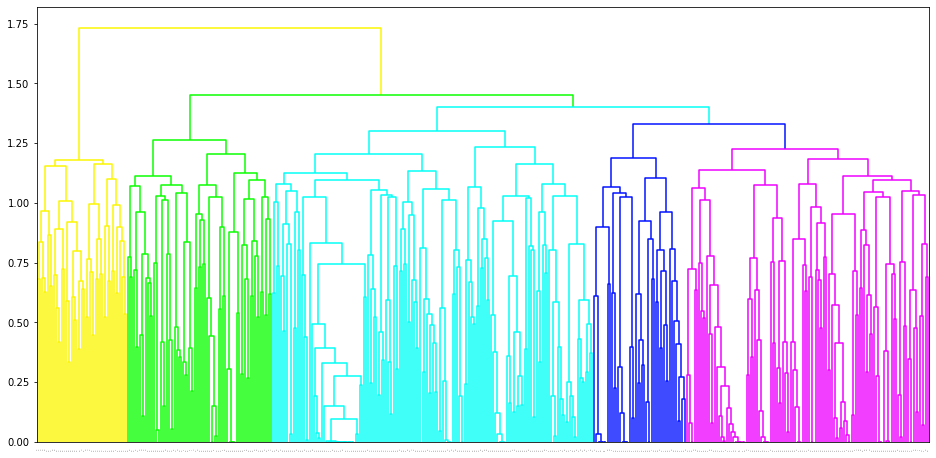

In [8]:
fig_tree = mp.plot_tree(add_leaf_labels = False, leaf_font_size = 1)
fig_tree.savefig('./%s.cluster5_tree.png' % task, bbox_inches='tight', dpi=300)

In [9]:
mp.plot_scatter(enabled_data_labels = False, htmlname = './%s.C5_scatter' % task, radius=5)

2021-08-18 11:05:52,398 - INFO - [bidd-aggmap] - generate file: ././IBD.C5_scatter_feature points_443_correlation_umap_scatter
2021-08-18 11:05:52,428 - INFO - [bidd-aggmap] - save html file to ././IBD.C5_scatter_feature points_443_correlation_umap_scatter


In [10]:
mp.plot_grid(enabled_data_labels = False, htmlname = './%s.C5_scatter' % task)

2021-08-18 11:05:57,946 - INFO - [bidd-aggmap] - generate file: ././IBD.C5_scatter_feature points_443_correlation_umap_mp
2021-08-18 11:05:57,971 - INFO - [bidd-aggmap] - save html file to ././IBD.C5_scatter_feature points_443_correlation_umap_mp


In [11]:
X_new = mp.batch_transform(X, scale_method = 'minmax')

100%|##########| 110/110 [00:03<00:00, 30.96it/s]


In [12]:
X_new.max(), X_new.min()

(0.9999999988659228, 0.0)

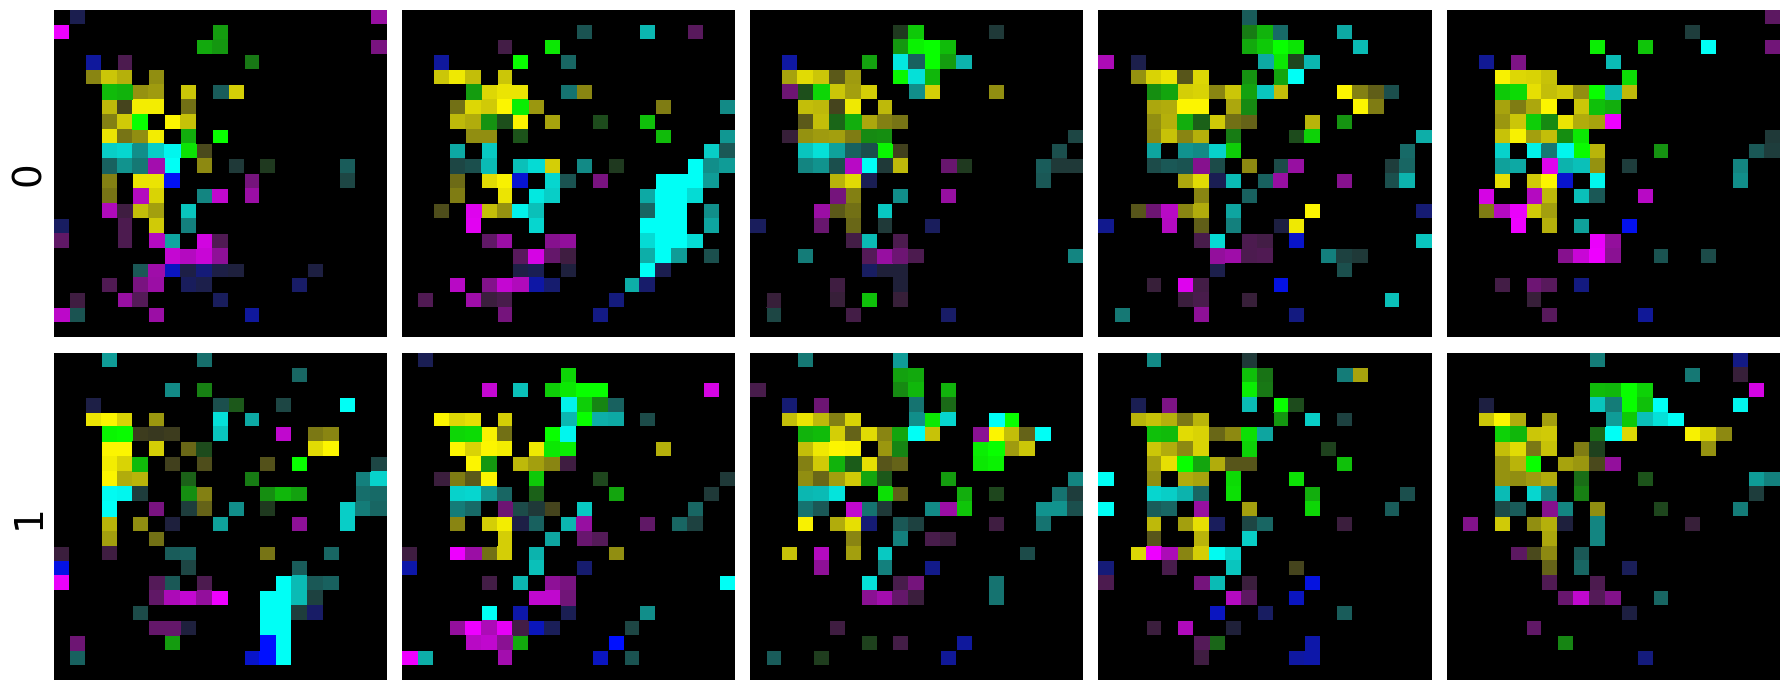

In [13]:
idx = dfy.groupby([1]).apply(lambda x:x.index.tolist())
rows = idx.index.tolist()

sns.reset_orig()

n = 5
fontsize = 28

fig, axes = plt.subplots(nrows=2, ncols=n, figsize=(18, 7), sharex = True, sharey = True)

rows = [0, 1]

for row, row_ax in zip(rows, axes):
    
    cidx = idx.loc[row][:5]     
    for cid, ax in zip(cidx, row_ax):
        x = X_new[cid]
        show.imshow(x, ax = ax,  mode = 'dark', color_list= pd.Series(mp.colormaps).tolist(), x_max= 1, vmin=-0.1, vmax=0.9)

for ax, row_name in zip(axes[:, 0], rows):
    ax.set_ylabel(row_name, fontsize =fontsize)  
    
fig.tight_layout()
#fig.savefig('./results/fmaps.pdf', bbox_inches='tight', dpi=400) 

In [119]:
s

,k,p,c,o,f,g,s
0,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter_smithii
1,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter_unclassified
2,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera_stadtmanae
3,Bacteria,Acidobacteria,Acidobacteriia,Acidobacteriales,Acidobacteriaceae,Acidobacteriaceae_unclassified,NaN
4,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Actinomycetaceae,Actinomyces,Actinomyces_graevenitzii
...,...,...,...,...,...,...,...
438,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Pediococcus,Pediococcus_lolii
439,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiales_Family_XI_Incertae_Sedis,Peptoniphilus,Peptoniphilus_sp_oral_taxon_375
440,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,Acidaminococcus_sp_HPA0509
441,Bacteria,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,Helicobacter_pullorum


In [14]:
species_list = dfx.columns
level = 'c'
s = pd.Series(species_list).apply(lambda x: dict([i.split('__') for i in x.split('|')])).apply(pd.Series)
so = s.groupby(level).size() 
md = {}
for i, j in so.items():
    if j < 10:
        md[i] = 'others'
    else:
        md[i] = i
        
res = s[level].map(md)
feature_group_list = res.tolist()

In [15]:
res

0                   others
1                   others
2                   others
3                   others
4           Actinobacteria
              ...         
438                Bacilli
439             Clostridia
440          Negativicutes
441                 others
442    Gammaproteobacteria
Name: c, Length: 443, dtype: object

In [134]:
mp.fit(feature_group_list = feature_group_list)

UMAP(metric='precomputed', random_state=32, verbose=2)
Construct fuzzy simplicial set
Thu Aug 12 17:24:56 2021 Finding Nearest Neighbors
Thu Aug 12 17:24:56 2021 Finished Nearest Neighbor Search
Thu Aug 12 17:24:56 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Aug 12 17:24:57 2021 Finished embedding
2021-08-12 17:24:57,702 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-08-12 17:24:57,994 - INFO - [bidd-aggmap] - Finished


In [135]:
mp.plot_scatter(enabled_data_labels = False, radius=5)

2021-08-12 17:24:57,999 - INFO - [bidd-aggmap] - generate file: ././results/IBD.C5_scatter_feature points_443_correlation_umap_scatter
2021-08-12 17:24:58,022 - INFO - [bidd-aggmap] - save html file to ././results/IBD.C5_scatter_feature points_443_correlation_umap_scatter


In [136]:
mp.plot_grid()

2021-08-12 17:24:58,034 - INFO - [bidd-aggmap] - generate file: ./feature points_443_correlation_umap_mp
2021-08-12 17:24:58,057 - INFO - [bidd-aggmap] - save html file to ./feature points_443_correlation_umap_mp
